# MODELADO/PREDICCIONES
## PREGUNTA 8
### ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?

In [ ]:
# Instalar librerias
!pip install pandas numpy matplotlib seaborn scikit-learn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:

# Cargar Dataset LIMPIO
df = pd.read_csv('../data/CAvideos_clean_excel.csv', encoding='utf-8')

#Estos cambios se resetean al cargar denuevo el CSV
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce') #convertir a datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce') #convertir a datetime

Evaluación del Modelo: Regresión Lineal
R²:  0.7267
MAE: 633,923
RMSE: 1735438

Coeficientes del Modelo Lineal:


,Variable,Coeficiente
3,days_to_trending,98.381967
1,dislikes,56.966093
2,comment_count,-44.274276
0,likes,23.011901


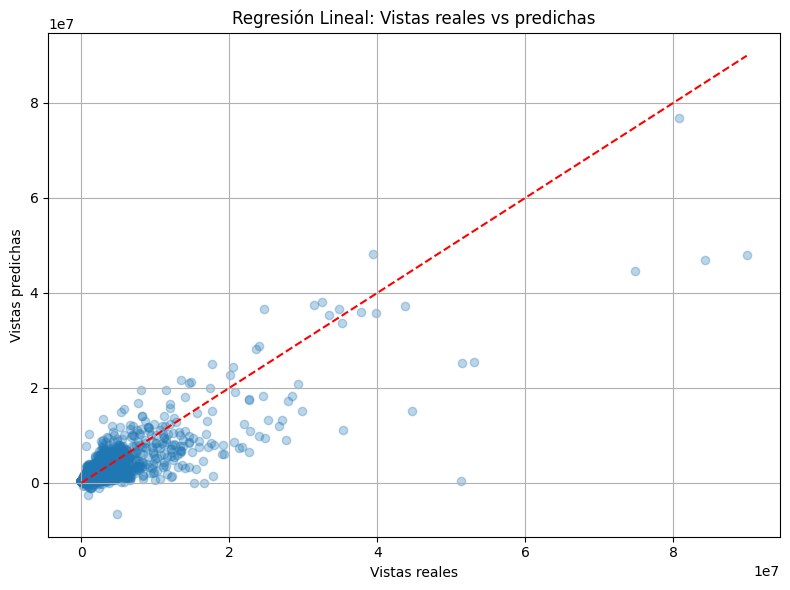

In [7]:
features = ['likes', 'dislikes', 'comment_count', 'days_to_trending']
target = 'views'

# Filtrar filas con datos válidos
df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

print("Evaluación del Modelo: Regresión Lineal")
print(f"R²:  {r2_score(y_test, y_pred_lr):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):,.0f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.0f}")

# Coeficientes
coef_lr = pd.DataFrame({
    'Variable': features,
    'Coeficiente': modelo_lr.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print("\nCoeficientes del Modelo Lineal:")
display(coef_lr)

# Gráfico
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Vistas reales')
plt.ylabel('Vistas predichas')
plt.title('Regresión Lineal: Vistas reales vs predichas')
plt.grid(True)
plt.tight_layout()
plt.show()

Evaluación del Modelo: Random Forest
R²:  0.8488
MAE: 451,330
RMSE: 1290764

Importancia de variables en Random Forest:


,Variable,Importancia
0,likes,0.681024
1,dislikes,0.224683
2,comment_count,0.057884
3,days_to_trending,0.036410


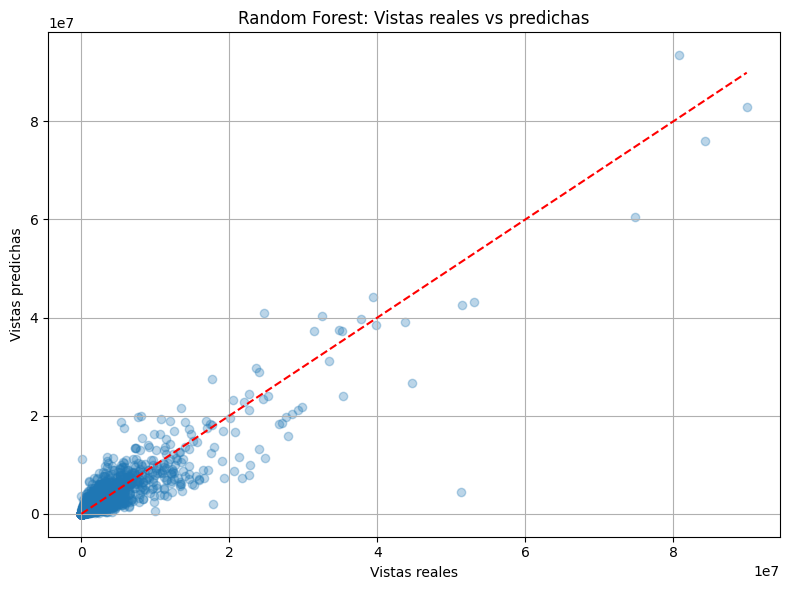

In [8]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

print("Evaluación del Modelo: Random Forest")
print(f"R²:  {r2_score(y_test, y_pred_rf):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):,.0f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.0f}")

# Importancia de variables
importancias_rf = pd.DataFrame({
    'Variable': features,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\nImportancia de variables en Random Forest:")
display(importancias_rf)

# Gráfico
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Vistas reales')
plt.ylabel('Vistas predichas')
plt.title('Random Forest: Vistas reales vs predichas')
plt.grid(True)
plt.tight_layout()
plt.show()